In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

In [4]:
# Labels, 0-9, list index == train_labels value
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
# Check data
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


# Preprocess Data

<function matplotlib.pyplot.show(*args, **kw)>

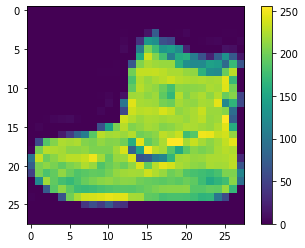

In [9]:
plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.grid(False)
plt.show

In [10]:
# Pixel values are between 0-255, for a NN we need our features to be scaled between 0-1
train_imgs = train_imgs / 255
test_imgs = test_imgs / 255

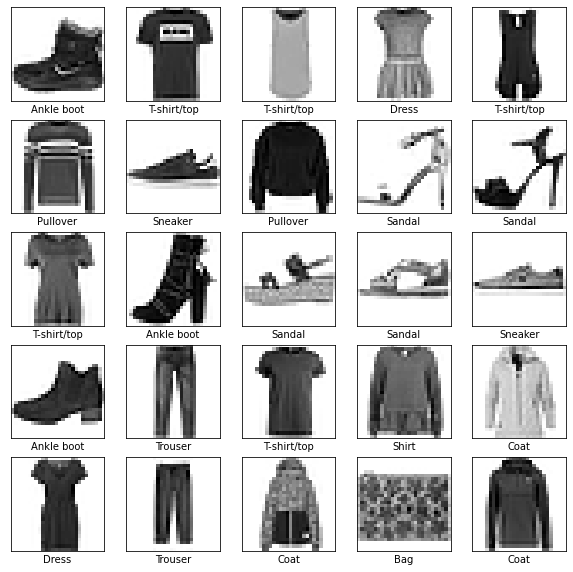

In [11]:
# Verify rescaling has worked and labels are correct by plotting 25 images w/ labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Train Model

In [13]:
# Define the model, we will use layer that flattens (ravels) the image, a densely connect 128 node layer and then an output layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# We also wish to define the Loss Function = Fn that the NN optimises
# The Optimiser = The method by which nodes are updated to minimise the Loss Fn
# The metric = the metric we use to measure the performance

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_imgs, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 669us/step - loss: 0.5061 - accuracy: 0.8228
Epoch 2/20
1875/1875 [==============================] - 1s 650us/step - loss: 0.3826 - accuracy: 0.8621
Epoch 3/20
1875/1875 [==============================] - 1s 657us/step - loss: 0.3395 - accuracy: 0.8763
Epoch 4/20
1875/1875 [==============================] - 1s 654us/step - loss: 0.3182 - accuracy: 0.8837
Epoch 5/20
1875/1875 [==============================] - 1s 652us/step - loss: 0.2976 - accuracy: 0.8902
Epoch 6/20
1875/1875 [==============================] - 1s 655us/step - loss: 0.2829 - accuracy: 0.8949
Epoch 7/20
1875/1875 [==============================] - 1s 651us/step - loss: 0.2702 - accuracy: 0.9003
Epoch 8/20
1875/1875 [==============================] - 1s 653us/step - loss: 0.2618 - accuracy: 0.9026
Epoch 9/20
1875/1875 [==============================] - 1s 652us/step - loss: 0.2480 - accuracy: 0.9076
Epoch 10/20
1875/1875 [==============================] - 1s 673u

# Evaluate Accuracy

In [15]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)

print(f'\nTest Accuracy: {test_acc}')

313/313 - 0s - loss: 0.3455 - accuracy: 0.8928

Test Accuracy: 0.892799973487854


This lower accuracy on the test set indicates there may be overfitting in the model, go to: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting

# Make Predictions

In [16]:
# To make predictions more readable we can add a softmax layer to the model which converts the logit 
# (raw prediction vector) outputs to a probability vector, with a probility for each class

probabilty_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [17]:
predictions = probabilty_model.predict(test_imgs)
predictions[0]

array([9.4269398e-11, 9.9661043e-11, 1.9890688e-12, 4.2143277e-13,
       6.9095098e-11, 1.1858051e-07, 9.2335396e-11, 2.0529004e-03,
       2.6463214e-11, 9.9794704e-01], dtype=float32)

In [19]:
pred = np.argmax(predictions[0])
print(pred)
print(class_names[pred])
print(test_labels[0])

9
Ankle boot
9


In [20]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        colour = 'blue'
    else:
        colour = 'red'
        
    plt.xlabel(f'{class_names[predicted_label]}  {100*np.max(predictions_array):.2f}%  {class_names[true_label]}', color=colour)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

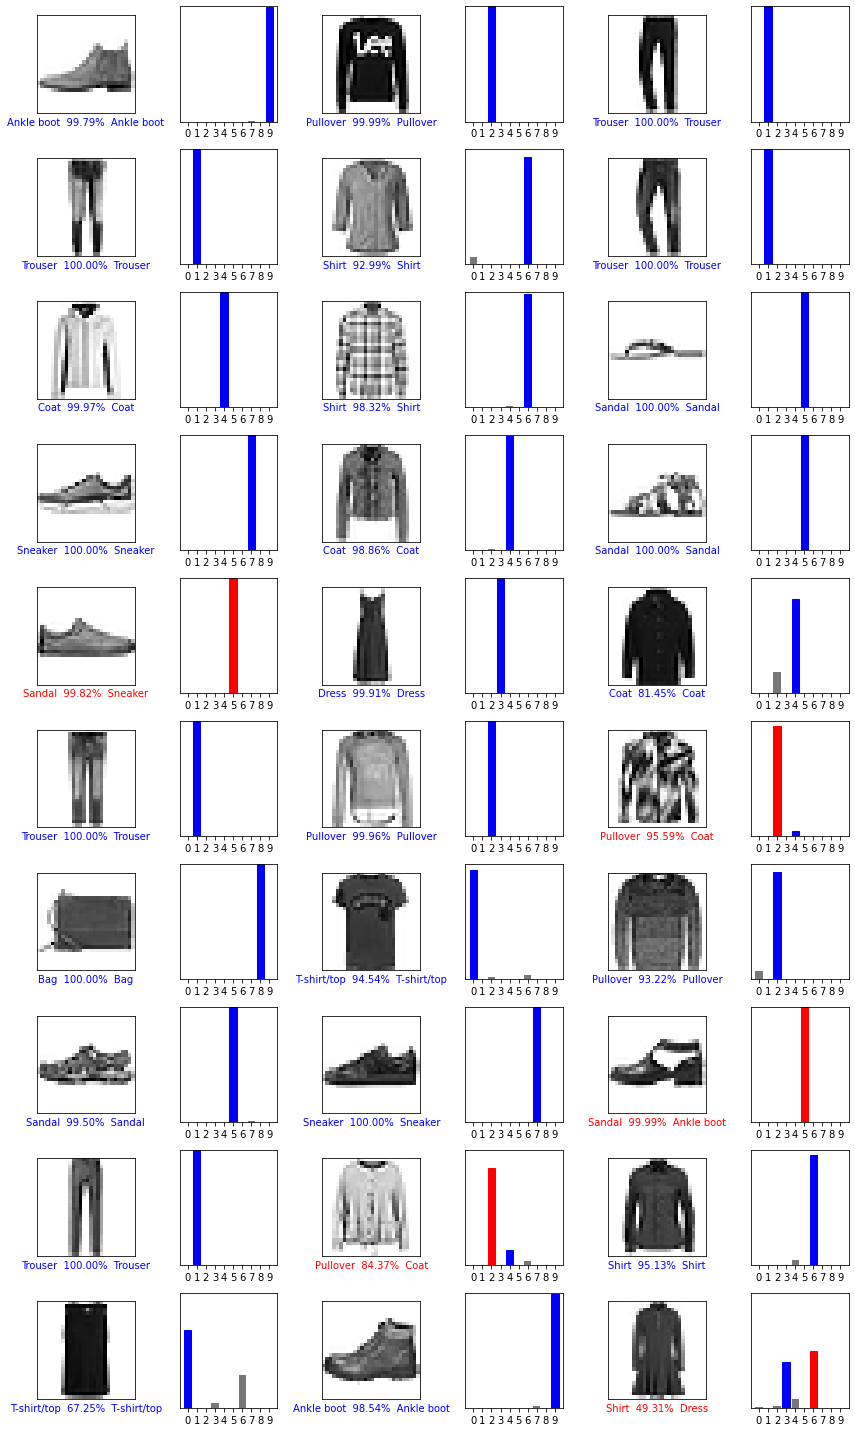

In [30]:
num_rows = 10
num_cols = 3

num_imgs = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_imgs):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i, predictions[i], test_labels, test_imgs)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

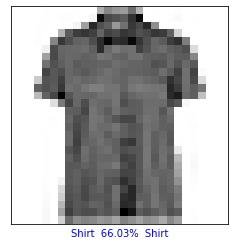

In [35]:
# for a single image
img = test_imgs[2578]
# Add it to a test batch where its the only member
img = (np.expand_dims(img, 0))

prediction_single = probabilty_model.predict(img)

plot_image(2578, prediction_single[0], test_labels, test_imgs)
plt.show()

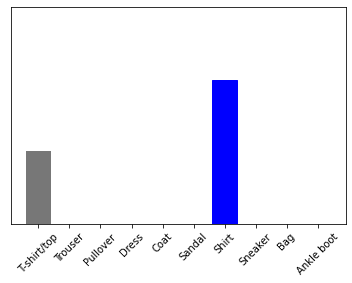

In [36]:
plot_value_array(2578, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)